  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    adviser     32/60   125   256   6000   256     16    128  198
1     amdahl    470v/7    29  8000  32000    32      8     32  269
2     amdahl   470v/7a    29  8000  32000    32      8     32  220
3     amdahl   470v/7b    29  8000  32000    32      8     32  172
4     amdahl   470v/7c    29  8000  16000    32      8     16  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 14.8+ KB
Non

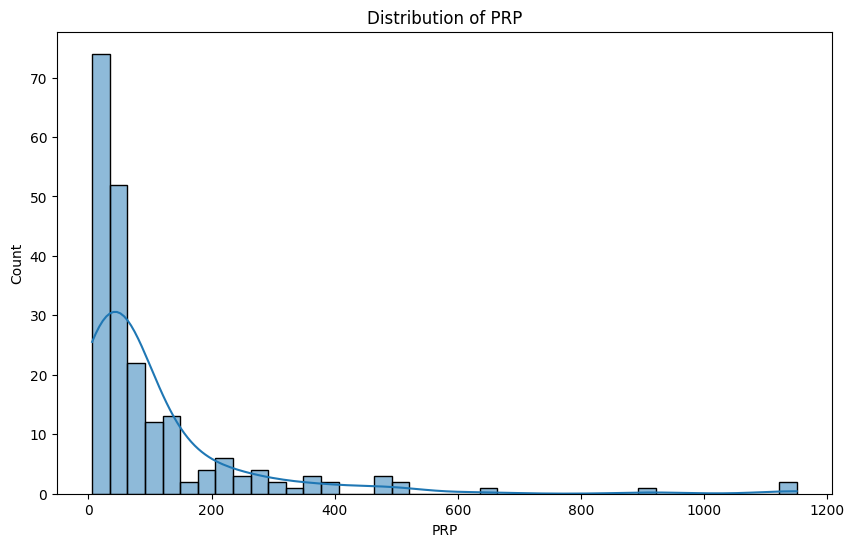

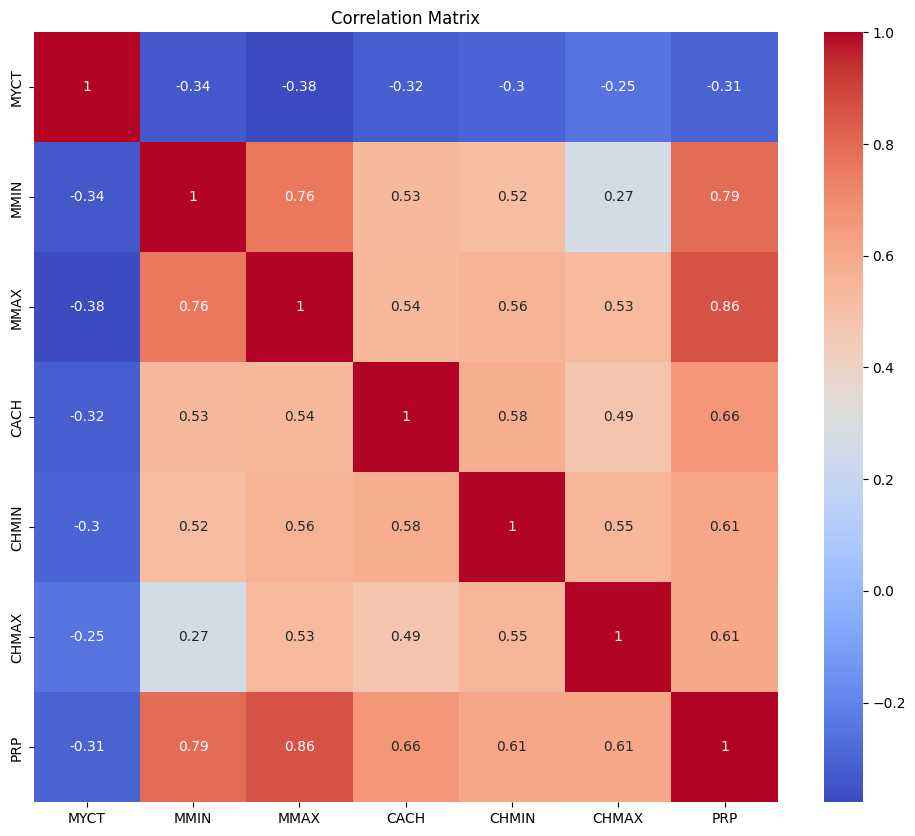

Cross-Validation R^2 Scores: [ 0.63229752  0.41201351 -0.4480466   0.8422106   0.76487551 -0.04917505
  0.88779833  0.90986424  0.85308127  0.85357074]
Mean Cross-Validation R^2 Score: 0.5658490064954826
Training Data - MSE: 3117.658905430177, MAE: 35.12200634651682, R^2: 0.8378284557995717
Testing Data - MSE: 5633.068155793262, MAE: 48.06880134700473, R^2: 0.8893455830696774


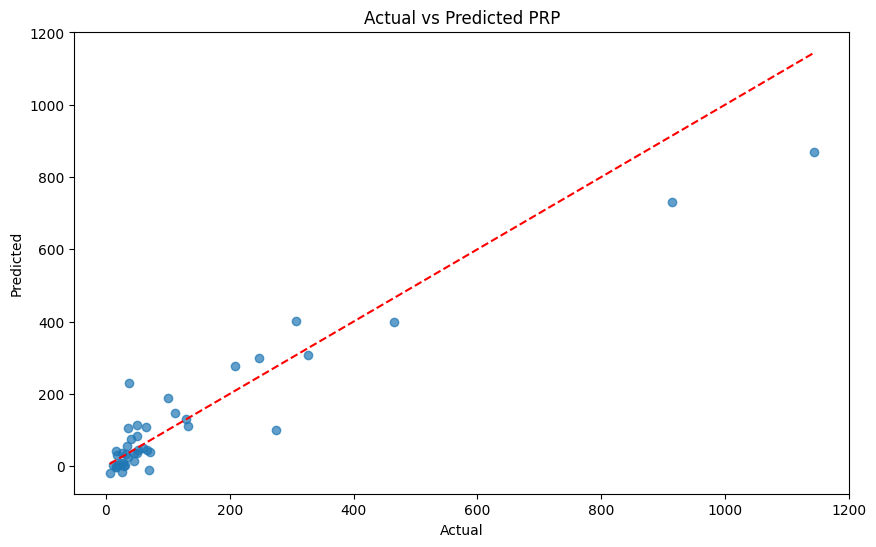

Cross-Validation R^2 Scores (Polynomial): [ 0.65739366 -2.1182267  -2.14599829 -0.75183958 -9.0583313  -1.8378534
 -0.73248136 -2.56523802 -1.49959828 -0.79846186]
Mean Cross-Validation R^2 Score (Polynomial): -2.085063512032984
Training Data (Polynomial) - MSE: 13586.763473053892, MAE: 88.02694610778443, R^2: 0.2932561001867845
Testing Data (Polynomial) - MSE: 66863.89732142857, MAE: 158.1845238095238, R^2: -0.31345571670075567


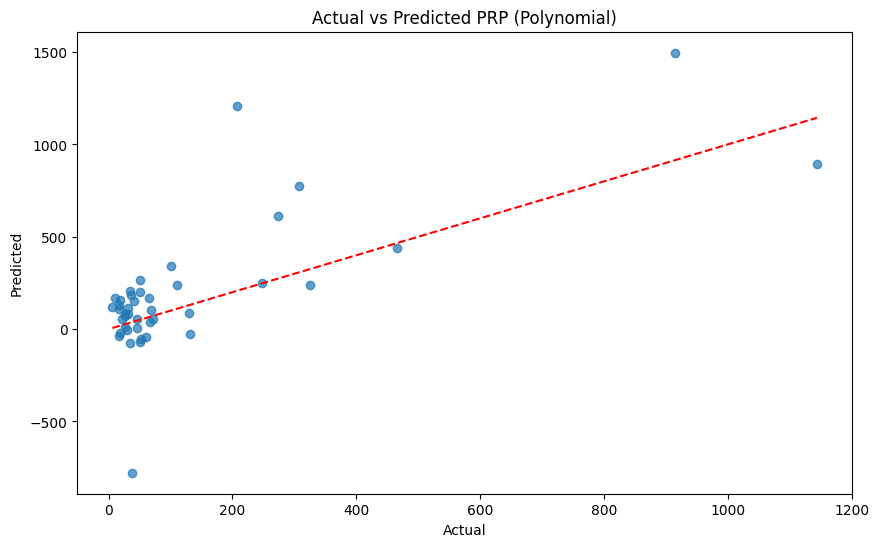

In [65]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the dataset, skipping the first row
data = pd.read_csv('machine.data.csv', header=None, skiprows=1)
data.columns = ['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']

# Display the first few rows of the dataset
print(data.head())

# Displaying the basic information and statistics of the dataset
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Visualizing the distribution of the target variable 'PRP'
plt.figure(figsize=(10, 6))
sns.histplot(data['PRP'], kde=True)
plt.title('Distribution of PRP')
plt.show()

# Dropping non-numeric columns 'VendorName' and 'ModelName'
data = data.drop(['VendorName', 'ModelName'], axis=1)

# Ensure all columns are numeric
data = data.apply(pd.to_numeric)

# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Splitting the dataset into features and target variable
X = data.drop('PRP', axis=1)
y = data['PRP']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Performing cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2')
print('Cross-Validation R^2 Scores:', cv_scores)
print('Mean Cross-Validation R^2 Score:', np.mean(cv_scores))

# Predicting on training and testing data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluating the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Training Data - MSE: {mse_train}, MAE: {mae_train}, R^2: {r2_train}')

# Evaluating the model on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Testing Data - MSE: {mse_test}, MAE: {mae_test}, R^2: {r2_test}')

# Visualizing the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PRP')
plt.show()

# Adding polynomial features to improve the model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Splitting the polynomial features data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Training the Linear Regression model on polynomial features
lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly, y_train)

# Performing cross-validation on polynomial features
cv_scores_poly = cross_val_score(lr_model_poly, X_train_poly, y_train, cv=10, scoring='r2')
print('Cross-Validation R^2 Scores (Polynomial):', cv_scores_poly)
print('Mean Cross-Validation R^2 Score (Polynomial):', np.mean(cv_scores_poly))

# Predicting on training and testing data with polynomial features
y_train_pred_poly = lr_model_poly.predict(X_train_poly)
y_test_pred_poly = lr_model_poly.predict(X_test_poly)

# Evaluating the model on training data with polynomial features
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
print(f'Training Data (Polynomial) - MSE: {mse_train_poly}, MAE: {mae_train_poly}, R^2: {r2_train_poly}')

# Evaluating the model on testing data with polynomial features
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)
print(f'Testing Data (Polynomial) - MSE: {mse_test_poly}, MAE: {mae_test_poly}, R^2: {r2_test_poly}')

# Visualizing the predicted vs actual values with polynomial features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_poly, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PRP (Polynomial)')
plt.show()
